In [2]:
from dl1_data_handler.reader import DL1DataReader
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper

#from dl1_data_handler.writer import DL1DataWriter
#from dl1_data_handler.writer import CTAMLDataDumper

import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Loading Gamma Testfile using the DL1DataReader:

filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
reader_g = DL1DataReader([filePath_gamma])
print("Sucessfully opended gamma data with DataLoader!")


Sucessfully opended gamma data with DataLoader!


In [17]:
# Exploring the File

print(reader_g)
print(dir(reader_g))
print(dir(reader_g.__dict__))
print(dir(reader_g.__dir__))
print(reader_g.event_info)

# As described in dl1_data_handler_demo.ipynb:

print("Image shape: {}".format(reader_g[0][0].shape))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_append_subarray_info', '_construct_simulated_info', '_construct_unprocessed_example_description', '_get_camera_type', '_get_image', '_v_attrs', 'class_weight', 'event_info', 'files', 'mode', 'shower_primary_id_to_name', 'subarray_info']
['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setit

TypeError: 'DL1DataReader' object is not subscriptable

### Here we go:

In [12]:
from dl1_data_handler.reader import DL1DataReader
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper

#from dl1_data_handler.writer import DL1DataWriter
#from dl1_data_handler.writer import CTAMLDataDumper

import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
data_g = tables.open_file(filePath_gamma, mode="r")
print(data_g.get_node('/dl1/event/telescope/images/tel_001').read())

[(13275,   32910, 1, [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.000000

In [7]:
#print(data_g.get_node('/dl1/event/telescope/images/tel_001').read()[0][3])
tel1_raw = data_g.get_node('/dl1/event/telescope/images/tel_001').read()
tel2_raw = data_g.get_node('/dl1/event/telescope/images/tel_002').read()
tel3_raw = data_g.get_node('/dl1/event/telescope/images/tel_003').read()
tel4_raw = data_g.get_node('/dl1/event/telescope/images/tel_004').read()



In [11]:
tel1 = np.stack([data[-1] for data in tel1_raw])
tel2 = np.stack([data[-1] for data in tel2_raw])
tel3 = np.stack([data[-1] for data in tel3_raw])
tel4 = np.stack([data[-1] for data in tel4_raw])

labels = np.stack([data[2] for data in tel1_raw])

print(np.shape(tel1))
print(np.shape(tel2))
print(np.shape(tel3))
print(np.shape(tel4))
print(np.shape(labels))
print(labels)

(106319, 960)
(106319, 960)
(106319, 960)
(106319, 960)
(106319,)
[1 1 1 ... 1 1 1]


In [50]:
#tel1 = np.array(data_g.get_node('/dl1/event/telescope/images/tel_001').read())
print((tel1))
dataset = tel1

[(13275,   32910, 1, [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.000000

In [53]:
# Extract numpy_array_with_data from each tuple
data_array = np.stack([data[-1] for data in dataset])

# Print the resulting array
print(np.shape(data_array))

(106319, 960)


In [13]:
# Following the description of test_image_mapper.ipynb:
from dl1_data_handler.reader import DL1DataReader
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper
# Define the camera types and mapping methods
hex_cams = ['HESS-I']
camera_types = hex_cams 
hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
               'bilinear_interpolation', 'bicubic_interpolation', 
               'image_shifting', 'axial_addressing']


In [14]:

# Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    %timeit mappers[method] = ImageMapper(mapping_method=mapping_method,camera_types=["HESS-I"])

Initialization time (total for all telescopes):
oversampling
101 ms ± 5.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
rebinning
642 ms ± 48.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
nearest_interpolation
75.2 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
bilinear_interpolation
214 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
bicubic_interpolation
1.99 s ± 254 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
image_shifting
37.6 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
axial_addressing
58.6 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
# takes forever

event_nr_range = range(len(tel1))
test_pixel_values = {}

for event_nr in event_nr_range:
    test_pixel_values[event_nr] = {}
    for cam in camera_types:
        num_pixels = len(CameraGeometry.from_name(cam).pix_id)
        test_pixel_values[event_nr][cam] = tel1[event_nr]  # np.arange(num_pixels)
        test_pixel_values[event_nr][cam] = np.expand_dims(test_pixel_values[event_nr][cam], axis=1)

KeyboardInterrupt: 

In [72]:
import numpy as np
# Generate test pixel values (value is the pixel number)
event_nr = 1 
test_pixel_values = {}
for cam in camera_types:
    num_pixels = len(CameraGeometry.from_name(cam).pix_id)
    #test_pixel_values[cam] = tel1[event_nr] #np.arange(num_pixels)
    test_pixel_values[cam] = np.stack([tel1[event_nr] for event_nr in range(len(tel1))])
    test_pixel_values[cam] = np.expand_dims(test_pixel_values[cam], axis=1)

In [77]:

# Convert test_pixel_values to a multidimensional NumPy array
#data_array = np.concatenate([test_pixel_values[cam] for cam in camera_types], axis=1) # WORKS

# Print the resulting array
print(test_pixel_values)


{'HESS-I': array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[14., 14., 10., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-1., -1., -1., ..., -1., -1., -1.]]], dtype=float32)}


In [47]:
default_mapper = ImageMapper(camera_types=['HESS-I'])
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types},camera_types=["HESS-I"])

image = default_mapper.map_image(data_array[0],cam)

ValueError: dimension mismatch

In [22]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

In [75]:
# Plot mapped images with and without padding
default_mapper = ImageMapper(camera_types=['HESS-I'])
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types},camera_types=["HESS-I"])

#image = default_mapper.map_image(data_array[0].ravel())

for cam in camera_types:
    print('{}: Default'.format(cam))
    #pixel_values = test_pixel_values[cam].reshape(len(test_pixel_values[cam]), -1)
    image = default_mapper.map_image(test_pixel_values[cam], cam)
    #image = default_mapper.map_image(data_array[0].ravel())
    plot_image(image)
    print('{}: Padding'.format(cam))
    image = padding_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)


HESS-I: Default


ValueError: dimension mismatch

In [1]:
# Processing HESS data for usage in CNN code from MoDA project
# Author: Hannes Warnhofer
# hannes.warnhofer@fau.de

import tables
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import random

import fnmatch
import os
#import h5
import glob
import pickle
import sys
import argparse

from ctapipe.io import EventSource
from ctapipe import utils
from ctapipe.instrument.camera import CameraGeometry

from dl1_data_handler.reader import DL1DataReader
from dl1_data_handler.image_mapper import ImageMapper

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Concatenate, concatenate, Dense,Embedding, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dropout, ConvLSTM2D, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.models import Model, Sequential

filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
#filePath_gamma = "../../../../wecapstor1/caph/mppi111h/old_dataset/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
#filePath_gamma = "../../../../wecapstor1/caph/mppi111h/new_sims/dnn/gamma_diffuse_noZBDT_noLocDist_hybrid_v2.h5"

filePath_proton="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_proton_hybrid_preselect_20deg_0deg.h5"
#filePath_proton = "../../../../wecapstor1/caph/mppi111h/old_dataset/phase2d3_timeinfo_proton_hybrid_preselect_20deg_0deg.h5"
#filePath_proton="../../../../wecapstor1/caph/mppi111h/new_sims/dnn/proton_noZBDT_noLocDist_hybrid_v2.h5"

data_g = tables.open_file(filePath_gamma, mode="r")

print("Successfully opened gamma data!")
#print(data_g)


# Assigning telescope data to different arrays
tel1g_raw = data_g.get_node('/dl1/event/telescope/images/tel_001').read()
tel2g_raw = data_g.get_node('/dl1/event/telescope/images/tel_002').read()
tel3g_raw = data_g.get_node('/dl1/event/telescope/images/tel_003').read()
tel4g_raw = data_g.get_node('/dl1/event/telescope/images/tel_004').read()

# Reshaping arrays and extracting the data
tel1g = np.stack([data[-1] for data in tel1g_raw])
tel2g = np.stack([data[-1] for data in tel2g_raw])
tel3g = np.stack([data[-1] for data in tel3g_raw])
tel4g = np.stack([data[-1] for data in tel4g_raw])

labelsg = np.stack([data[2] for data in tel1g_raw])
labelsg_ones = np.ones_like(labelsg)

del tel1g_raw
del tel2g_raw
del tel3g_raw
del tel4g_raw

data_g.close()


data_p = tables.open_file(filePath_proton, mode="r")

print("Successfully opened proton data!")
#print(data_p)

# Assigning telescope data to different arrays
tel1p_raw = data_p.get_node('/dl1/event/telescope/images/tel_001').read()
tel2p_raw = data_p.get_node('/dl1/event/telescope/images/tel_002').read()
tel3p_raw = data_p.get_node('/dl1/event/telescope/images/tel_003').read()
tel4p_raw = data_p.get_node('/dl1/event/telescope/images/tel_004').read()

# Reshaping arrays and extracting the data
tel1p = np.stack([data[-1] for data in tel1p_raw])
tel2p = np.stack([data[-1] for data in tel2p_raw])
tel3p = np.stack([data[-1] for data in tel3p_raw])
tel4p = np.stack([data[-1] for data in tel4p_raw])

labelsp = np.stack([data[2] for data in tel1p_raw])
labelsp_zeros = np.zeros_like(labelsp)

del tel1p_raw
del tel2p_raw
del tel3p_raw
del tel4p_raw

data_p.close()

tel1 = np.concatenate((tel1g,tel1p),axis=0)
tel2 = np.concatenate((tel2g,tel2p),axis=0)
tel3 = np.concatenate((tel3g,tel3p),axis=0)
tel4 = np.concatenate((tel4g,tel4p),axis=0)
labels = np.concatenate((labelsg_ones,labelsp_zeros),axis=0)

#tel1 = np.vstack((tel1g, tel1p))
#tel2 = np.vstack((tel2g, tel2p))
#tel3 = np.vstack((tel3g, tel3p))
#tel4 = np.vstack((tel4g, tel4p))
#labels = np.vstack((labelsg_ones, labelsp_zeros))

del tel1p
del tel1g
del tel2p
del tel2g
del tel3p
del tel3g
del tel4p
del tel4g
del labelsp
del labelsg
del labelsp_zeros
del labelsg_ones

print(np.shape(tel1))
print(np.shape(tel2))
print(np.shape(tel3))
print(np.shape(tel4))
print(np.shape(labels))
print(labels)

# Define the camera types and mapping methods: HESS-I only

hex_cams = ['HESS-I']
camera_types = hex_cams 
#hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
#               'bilinear_interpolation', 'bicubic_interpolation', 
#               'image_shifting', 'axial_addressing']
hex_methods = ['axial_addressing']
#Load the image mappers
mappers = {}
print("Start Initializing Mappers...")
print(os.system("pwd")) 
current_directory = os.getcwd()
print(current_directory)
#raise KeyboardInterrupt 
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    mappers[method] = ImageMapper(mapping_method=mapping_method,camera_types=["HESS-I"])
print("... Finished Initializing Mappers")
# Reshape arrays for mapping
# Defining how many events should be mapped and used later on
num_events = 1000#len(labels) # Takes very long with many events on my PC, for testing: num_events = 10000 (len(test_pixel_values)=106319)

# Defining image shape and mapper type
default_mapper = ImageMapper(camera_types=['HESS-I'])
#padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types}, camera_types=["HESS-I"])
#image_shape = default_mapper.map_image(tel1[0], 'HESS-I').shape

# Creating empty arrays for mapped images and the associated labels
mapped_images_1 = np.empty((num_events, 72,72,1))
mapped_images_2 = np.empty((num_events, 72,72,1))
mapped_images_3 = np.empty((num_events, 72,72,1))
mapped_images_4 = np.empty((num_events, 72,72,1))
mapped_labels = np.empty(num_events)

# Using the map_image function for mapping the data from the different telescopes to the associated empty array
# Drawing radom num_events events from all the data 
length = num_events
max_value = len(tel1)
#random_list = random.sample(range(max_value),length) 
random_list = np.random.randint(max_value, size=length)
image_nr = 0
print("Start Mapping...")
for event_nr in random_list:
    test_pixel_values_1 = np.expand_dims(tel1[event_nr], axis=1)
    mapped_images_1[image_nr] = default_mapper.map_image(test_pixel_values_1, 'HESS-I')
    test_pixel_values_2 = np.expand_dims(tel2[event_nr], axis=1)
    mapped_images_2[image_nr] = default_mapper.map_image(test_pixel_values_2, 'HESS-I')
    test_pixel_values_3 = np.expand_dims(tel3[event_nr], axis=1)
    mapped_images_3[image_nr] = default_mapper.map_image(test_pixel_values_3, 'HESS-I')        
    test_pixel_values_4 = np.expand_dims(tel4[event_nr], axis=1)
    mapped_images_4[image_nr] = default_mapper.map_image(test_pixel_values_4, 'HESS-I')
    mapped_labels[image_nr] = labels[event_nr]
    image_nr=image_nr+1

print("... Finished Mapping")

mapped_images = np.array([mapped_images_1,mapped_images_2,mapped_images_3,mapped_images_4])
print(np.shape(mapped_images_1))
print(np.shape(mapped_images))

# Reshape the final array, so it is present in the same way as MoDAII data
mapped_images = np.transpose(mapped_images, (1, 0, 2, 3, 4))
mapped_images = np.squeeze(mapped_images, axis=-1)
mapped_labels = mapped_labels[:,np.newaxis]

print(np.shape(mapped_images))
print(np.shape(mapped_labels))



2023-06-23 13:07:07.766168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Successfully opened gamma data!
Successfully opened proton data!
(212023, 960)
(212023, 960)
(212023, 960)
(212023, 960)
(212023,)
[1 1 1 ... 0 0 0]
Start Initializing Mappers...
/home/hanneswarnhofer/ECAP_HiWi_WorkingDirectory
0
/home/hanneswarnhofer/ECAP_HiWi_WorkingDirectory
Initialization time (total for all telescopes):
axial_addressing
... Finished Initializing Mappers
Start Mapping...
... Finished Mapping
(1000, 72, 72, 1)
(4, 1000, 72, 72, 1)
(1000, 4, 72, 72)
(1000, 1)


In [14]:
########################################################
# START WITH CNN STUFF

num_epochs = 20
batch_size = 256
rate = 0.2
reg = 0.0015
patience = 5

# Define the appendix to the file, for being able to specify some general changes in the model structure and trace back the changes when comparing the results of t´different models
fnr = "_2023-06-23_"

peak_times = mapped_images
event_labels = mapped_labels

# some reshaping for the further use of the timing data in the CNN
peak_times = peak_times.reshape((*np.shape(peak_times),1))

# overview about the important data array for later usage
print(np.shape(peak_times)[0], " events with 4 images each are available \n")
print("Shape of 'event_labels': ",np.shape(event_labels))
print("Shape of 'peak_times': ",np.shape(peak_times),"\n")

# split into random training data (80%) and test data (20%)
train_data, test_data, train_labels, test_labels = [], [], [], []
random_selection = np.random.rand(np.shape(peak_times)[0]) <= 0.8
train_data.append(peak_times[random_selection])
test_data.append(peak_times[~random_selection])
train_labels.append(event_labels[random_selection])
test_labels.append(event_labels[~random_selection])


# free some memory space
del peak_times
del event_labels

# convert to numpy array and reshape 
train_data = np.array(train_data)
train_data = train_data.reshape(np.shape(train_data[0]))
test_data = np.array(test_data)
test_data = test_data.reshape(np.shape(test_data[0]))

train_labels = np.array(train_labels)
train_labels = train_labels.reshape(np.shape(train_labels[0]))
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(np.shape(test_labels[0]))

train_labels_multishape = np.zeros_like(train_data)
test_labels_multishape = np.zeros_like(test_data)

len_train = np.shape(train_data)[0]
len_test = np.shape(test_data)[0]

for i in range(0,len_train):
    train_labels_multishape[i,:,:,:] = train_labels[i]

for k in range(0,len_test):
    test_labels_multishape[k,:,:,:] = test_labels[k]

# overvew about the splitting into training and test data
print("Split into Training and Test Data")
print("Train data shape:", np.shape(train_data) , "-->",round(100*len_train/(len_train+len_test),2),"%")
print("Test data shape:", np.shape(test_data), "-->",round(100*len_test/(len_train+len_test),2), "%")
print("Train labels shape:", np.shape(train_labels))
print("Test labels shape:", np.shape(test_labels))




# split up different "telescopes" for the usage in the seperate single view CNNs (probably in the most long-winded way possible, but lets just ignore that)
train_data_1 = train_data[:,0,:,:] 
train_data_2 = train_data[:,1,:,:] 
train_data_3 = train_data[:,2,:,:] 
train_data_4 = train_data[:,3,:,:] 

test_data_1 = test_data[:,0,:,:]
test_data_2 = test_data[:,1,:,:]
test_data_3 = test_data[:,2,:,:]
test_data_4 = test_data[:,3,:,:]

train_labels_1 = train_labels_multishape[:,0,:,:]
train_labels_2 = train_labels_multishape[:,1,:,:]
train_labels_3 = train_labels_multishape[:,2,:,:]
train_labels_4 = train_labels_multishape[:,3,:,:]

test_labels_1 = test_labels_multishape[:,0,:,:]
test_labels_2 = test_labels_multishape[:,1,:,:]
test_labels_3 = test_labels_multishape[:,2,:,:]
test_labels_4 = test_labels_multishape[:,3,:,:]

print("Train data 1 shape:", np.shape(train_data_1))
print("Train labels 1 shape:", np.shape(train_labels_1))

print("Test data 1 shape:", np.shape(test_data_1))
print("Test labels 1 shape:", np.shape(test_labels_1))

1000  events with 4 images each are available 

Shape of 'event_labels':  (1000, 1)
Shape of 'peak_times':  (1000, 4, 72, 72, 1) 

Split into Training and Test Data
Train data shape: (807, 4, 72, 72, 1) --> 80.7 %
Test data shape: (193, 4, 72, 72, 1) --> 19.3 %
Train labels shape: (807, 1)
Test labels shape: (193, 1)
Train data 1 shape: (807, 72, 72, 1)
Train labels 1 shape: (807, 72, 72, 1)
Test data 1 shape: (193, 72, 72, 1)
Test labels 1 shape: (193, 72, 72, 1)


In [60]:
print(np.shape(train_data_1[1:4,:,:,:]))
print(np.shape(train_labels[1:4,:]))

(3, 72, 72, 1)
(3, 1)


In [69]:


class MyGenerator(keras.utils.Sequence):

    def __init__(self,images_1,images_2,images_3,images_4,labels,batch_size=64):
        self.batch_size = batch_size
        self.images_1 = images_1
        self.images_2 = images_2
        self.images_3 = images_3
        self.images_4 = images_4
        self.labels = labels
        self.sample_count = len(labels[:])
        self.batch_count = int(self.sample_count/batch_size)
        self.current_batch = 0
        self.index = 0

    def __len__(self):
        return self.batch_count
    
    def __getitem__(self,index):
        
        X = [self.images_1[self.current_batch*self.batch_size:(self.current_batch+1)*self.batch_size,:,:,:],self.images_2[self.current_batch*self.batch_size:(self.current_batch+1)*self.batch_size,:,:,:],self.images_3[self.current_batch*self.batch_size:(self.current_batch+1)*self.batch_size,:,:,:],self.images_4[self.current_batch*self.batch_size:(self.current_batch+1)*self.batch_size,:,:,:]]
        y = self.labels[self.current_batch*self.batch_size:(self.current_batch+1)*self.batch_size,:]

        self.current_batch +=1 
        self.data = (X,y)

        yield self.data
    
    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= self.sample_count:
            raise StopIteration
        result = self.__getitem__(self.index) 
        self.index += 1
        return result

    def reset_counters(self): 
        self.current_batch = 0 

        
    def on_epoch_end(self):
        self.reset_counters()

In [70]:
global training_generator
global testing_generator

training_generator = MyGenerator(train_data_1,train_data_2,train_data_3,train_data_4,train_labels)
testing_generator = MyGenerator(test_data_1,test_data_2,test_data_3,test_data_4,test_labels)

testing_generator.reset_counters()
testing_generator.reset_counters()


In [65]:
global training_generator_1
global testing_generator_1
training_generator_1 = MyGenerator(train_data_1,train_labels)
testing_generator_1 = MyGenerator(test_data_1,test_labels)

global training_generator_2
global testing_generator_2
training_generator_2 = MyGenerator(train_data_2,train_labels)
testing_generator_2 = MyGenerator(test_data_2,test_labels)

global training_generator_3
global testing_generator_3
training_generator_3 = MyGenerator(train_data_3,train_labels)
testing_generator_3 = MyGenerator(test_data_3,test_labels)

global training_generator_4
global testing_generator_4
training_generator_4 = MyGenerator(train_data_4,train_labels)
testing_generator_4 = MyGenerator(test_data_4,test_labels)


training_generator_1.reset_counters()
testing_generator_1.reset_counters()

training_generator_2.reset_counters()
testing_generator_2.reset_counters()

training_generator_3.reset_counters()
testing_generator_3.reset_counters()

training_generator_4.reset_counters()
testing_generator_4.reset_counters()

print(training_generator_1)

In [71]:

input_shape = (72, 72, 1)
pool_size = 2
kernel_size = 4

# Define the model for the single-view CNNs
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(filters=25, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg), input_shape=input_shape,))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    print("Before first Dropout")

    model.add(Dropout(rate))
    model.add(Conv2D(filters=50, kernel_size=kernel_size, activation='relu', padding='same', kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    print("After first Dropout")

    model.add(Dropout(rate))
    model.add(Conv2D(filters=50, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    print("After second Dropout")

    model.add(Dropout(rate))
    model.add(Conv2D(filters=100, kernel_size=kernel_size, activation='relu', padding='same',kernel_regularizer=regularizers.l2(reg)))
    model.add(MaxPooling2D(pool_size=pool_size, padding='same'))

    return model

# Define the model for the combination of the previous CNNs and the final CNN for classification

def run_multiview_model(models,inputs):

    merged = concatenate(models)

    Dropout1 = Dropout(rate)(merged)
    Conv_merged1 = Conv2D(filters=25,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout1)
    MaxPool_merged1 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged1)

    Dropout2 = Dropout(rate)(MaxPool_merged1)
    Conv_merged2 = Conv2D(filters=50,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout2)
    MaxPool_merged2 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged2)

    Dropout3 = Dropout(rate)(MaxPool_merged2)
    Conv_merged3 = Conv2D(filters=100,kernel_size=[2,2],activation='relu',padding='same',input_shape=(48,48,1))(Dropout3)
    MaxPool_merged3 = MaxPooling2D(pool_size=2,padding='same')(Conv_merged3)

    Flat_merged1 = Flatten()(MaxPool_merged3)
    Dropout4 = Dropout(rate)(Flat_merged1)
    dense_layer_merged1 = Dense(units=100, activation='relu')(Dropout4)

    Dropout5 = Dropout(rate)(dense_layer_merged1)
    dense_layer_merged2 = Dense(units=50, activation='relu')(Dropout5)

    Dropout6 = Dropout(rate)(dense_layer_merged2)
    dense_layer_merged3 = Dense(units=1, activation='sigmoid')(Dropout6)

    model = Model(inputs=inputs, outputs=dense_layer_merged3)
    return model

# Create four separate CNN models
input_1 = Input(shape=input_shape)
cnn_model_1 = create_cnn_model(input_shape)(input_1)

input_2 = Input(shape=input_shape)
cnn_model_2 = create_cnn_model(input_shape)(input_2)

input_3 = Input(shape=input_shape)
cnn_model_3 = create_cnn_model(input_shape)(input_3)

input_4 = Input(shape=input_shape)
cnn_model_4 = create_cnn_model(input_shape)(input_4)

# include early_stopping here, to see how it changes compared to previous model designs
#early_stopping = EarlyStopping(monitor='val_loss', patience=patience)

model_multi = run_multiview_model([cnn_model_1, cnn_model_2, cnn_model_3, cnn_model_4],[input_1, input_2, input_3, input_4])
model_multi.summary()
model_multi.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

Before first Dropout
After first Dropout
After second Dropout
Before first Dropout
After first Dropout
After second Dropout
Before first Dropout
After first Dropout
After second Dropout
Before first Dropout
After first Dropout
After second Dropout
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 72, 72, 1)]  0           []                               
                                                                                                  
 input_26 (InputLayer)          [(None, 72, 72, 1)]  0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 72, 72, 1)]  0           []                               
                                          

In [75]:
import matplotlib.pyplot as plt
def plot_image(image_1,image_2,image_3,image_4,image_nr):
    fig, ax = plt.subplots(2,2)
    ax[0,0].set_aspect(1)
    ax[0,0].pcolor(image_1[image_nr][:,:,0], cmap='viridis')
    ax[1,0].set_aspect(1)
    ax[1,0].pcolor(image_2[image_nr][:,:,0], cmap='viridis')
    ax[0,1].set_aspect(1)
    ax[0,1].pcolor(image_3[image_nr][:,:,0], cmap='viridis')
    ax[1,1].set_aspect(1)
    ax[1,1].pcolor(image_4[image_nr][:,:,0], cmap='viridis')
    plt.show()

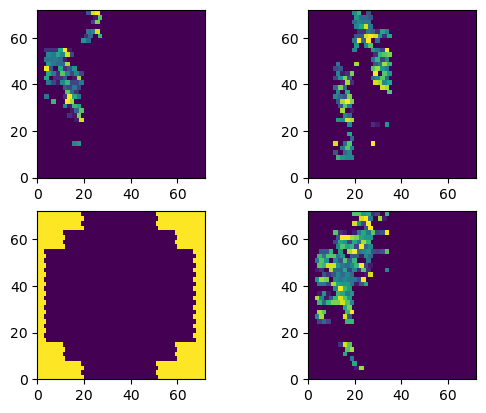

In [81]:
plot_image(train_data_1,train_data_2,train_data_3,train_data_4,5)

In [72]:
early_stopping_callback_1=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=4,verbose=1,mode='min')

def multi_input_generator(generator_list):
    while True:
        inputs = [next(generator) for generator in generator_list]
        yield inputs

# Create a single generator for training data
training_generator = multi_input_generator([training_generator_1, training_generator_2, training_generator_3, training_generator_4])
testing_generator = multi_input_generator([testing_generator_1, testing_generator_2, testing_generator_3, testing_generator_4])

# Train the model using the single generator
#history = model_multi.fit(training_generator, epochs=num_epochs, steps_per_epoch=num_steps, validation_data=testing_generator, validation_steps=num_val_steps, callbacks=[early_stopping_callback_1])
history = model_multi.fit(training_generator, epochs=num_epochs, batch_size= batch_size,validation_data=testing_generator, callbacks=[early_stopping_callback_1])

Epoch 1/20
12/12 [==============================] - 31s 2s/step - loss: 1.4472 - accuracy: 0.5249 - val_loss: 1.2740 - val_accuracy: 0.5349
Epoch 2/20
12/12 [==============================] - 27s 2s/step - loss: 1.1418 - accuracy: 0.5365 - val_loss: 1.0269 - val_accuracy: 0.5052
Epoch 3/20
12/12 [==============================] - 25s 2s/step - loss: 0.9415 - accuracy: 0.5417 - val_loss: 0.8741 - val_accuracy: 0.4948
Epoch 4/20
12/12 [==============================] - 26s 2s/step - loss: 0.8272 - accuracy: 0.5365 - val_loss: 0.7940 - val_accuracy: 0.5000
Epoch 5/20
12/12 [==============================] - 22s 2s/step - loss: 0.7607 - accuracy: 0.5417 - val_loss: 0.7479 - val_accuracy: 0.4896
Epoch 6/20
12/12 [==============================] - 23s 2s/step - loss: 0.7298 - accuracy: 0.5299 - val_loss: 0.7250 - val_accuracy: 0.4896
Epoch 7/20
12/12 [==============================] - 24s 2s/step - loss: 0.7100 - accuracy: 0.5404 - val_loss: 0.7122 - val_accuracy: 0.4948
Epoch 8/20
12/12 [==

In [67]:
early_stopping_callback_1=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=4,verbose=1,mode='min')

def multi_input_generator(generator_list):
    while True:
        inputs = [next(generator) for generator in generator_list]
        yield inputs

# Create a single generator for training data
training_generator = multi_input_generator([training_generator_1, training_generator_2, training_generator_3, training_generator_4])
testing_generator = multi_input_generator([testing_generator_1, testing_generator_2, testing_generator_3, testing_generator_4])

# Train the model using the single generator
#history = model_multi.fit(training_generator, epochs=num_epochs, steps_per_epoch=num_steps, validation_data=testing_generator, validation_steps=num_val_steps, callbacks=[early_stopping_callback_1])
history = model_multi.fit(training_generator, epochs=num_epochs, batch_size= batch_size,validation_data=testing_generator, callbacks=[early_stopping_callback_1])

#history = model_multi.fit([training_generator_1,training_generator_2,training_generator_3,training_generator_4],train_labels,epochs=num_epochs,batch_size=batch_size,validation_data=([testing_generator_1,testing_generator_2,testing_generator_3,testing_generator_4], test_labels), callbacks=[early_stopping_callback_1])


ValueError: Data is expected to be in format `x`, `(x,)`, `(x, y)`, or `(x, y, sample_weight)`, found: ((array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       ...,


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])), (array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       ...,


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])), (array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       ...,


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])), (array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       ...,


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])))

In [8]:
batch_array = np.zeros((sample_count, 4, 72, 72, 1))
print(np.shape(batch_array))
batch_array = (batch_array-np.amin(batch_array,axis=0))/(np.amax(batch_array,axis=0)-np.amin(batch_array,axis=0))
print(np.shape(batch_array))


(1000, 4, 72, 72, 1)
(1000, 4, 72, 72, 1)


/tmp/ipykernel_1610/4026373714.py:3: RuntimeWarning: invalid value encountered in divide
  batch_array = (batch_array-np.amin(batch_array,axis=0))/(np.amax(batch_array,axis=0)-np.amin(batch_array,axis=0))


In [13]:
countarr = np.arange(0, sample_count)

for idx in list(range(0, batches)):
    if idx == batches - 1:
        batch_idxs = countarr[idx * batch_size:]
    else:
        batch_idxs = countarr[idx *
                                batch_size:idx *
                                batch_size +
                                batch_size]
    X = trainarr[batch_idxs]
    X = np.nan_to_num(X)
    Y = keras.utils.to_categorical(labelsarr[batch_idxs], num_classes=3)
    yield (np.array(X), np.array(Y))

SyntaxError: 'yield' outside function (1806103080.py, line 14)